<a href="https://colab.research.google.com/github/firmansyahtelco/python/blob/main/TugasPython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [2]:
ls

PraktikumPython.ipynb  TugasPython10/  TugasPython.ipynb


In [4]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
print("[INFO] loading images...")
imagePaths = paths.list_images("TugasPython10")
data = []
labels = []

[INFO] loading images...


In [6]:
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
  image = Image.open(imagePath)
  image = np.array(image.resize((32, 32))) / 255.0
  data.append(image)

	# extract the class label from the file path and update the
	# labels list
  label = imagePath.split(os.path.sep)[-2]
  labels.append(label)

In [7]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [9]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]


In [10]:
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(711, 32, 32, 3)
(237, 32, 32, 3)


In [11]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(32*32*3,)),
        Dense(40, activation="relu", name="layer1"),
        Dense(45, activation="relu", name="layer2"),
        Dense(50, activation="relu", name="layer3"),
        Dense(60, activation="relu", name="layer4"),
        Dense(65, activation="relu", name="layer5"),
        Dense(60, activation="relu", name="layer6"),
        Dense(3, activation = "softmax", name="layer7"),
    ]
)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
layer1 (Dense)               (None, 40)                122920    
_________________________________________________________________
layer2 (Dense)               (None, 45)                1845      
_________________________________________________________________
layer3 (Dense)               (None, 50)                2300      
_________________________________________________________________
layer4 (Dense)               (None, 60)                3060      
_________________________________________________________________
layer5 (Dense)               (None, 65)                3965      
_________________________________________________________________
layer6 (Dense)               (None, 60)                3

In [13]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=35, batch_size=45,)

[INFO] training network...
Epoch 1/35
16/16 [==============================] - 0s 16ms/step - loss: 1.0320 - accuracy: 0.4177 - val_loss: 0.9373 - val_accuracy: 0.4810
Epoch 2/35
16/16 [==============================] - 0s 4ms/step - loss: 0.9725 - accuracy: 0.5443 - val_loss: 0.9110 - val_accuracy: 0.5654
Epoch 3/35
16/16 [==============================] - 0s 5ms/step - loss: 0.8757 - accuracy: 0.5865 - val_loss: 0.8306 - val_accuracy: 0.6245
Epoch 4/35
16/16 [==============================] - 0s 4ms/step - loss: 0.8131 - accuracy: 0.6217 - val_loss: 0.7713 - val_accuracy: 0.6667
Epoch 5/35
16/16 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.6723 - val_loss: 0.7138 - val_accuracy: 0.7004
Epoch 6/35
16/16 [==============================] - 0s 5ms/step - loss: 0.7330 - accuracy: 0.6807 - val_loss: 0.7149 - val_accuracy: 0.6878
Epoch 7/35
16/16 [==============================] - 0s 4ms/step - loss: 0.6464 - accuracy: 0.7454 - val_loss: 0.6340 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


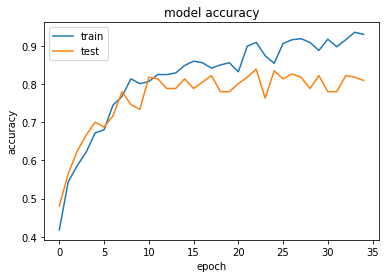

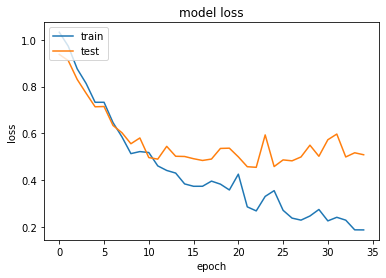

In [14]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=64)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       coast       0.78      0.78      0.78        89
      forest       0.88      0.80      0.84        87
     highway       0.77      0.87      0.82        61

    accuracy                           0.81       237
   macro avg       0.81      0.82      0.81       237
weighted avg       0.81      0.81      0.81       237

